In [1]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout,Flatten
from keras.callbacks import TensorBoard
from keras.constraints import maxnorm
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import random as rd
import numpy as np

In [2]:
# Setting up Tensor board for recording... Pretty trivial. Mostly needed to generate charts
tensorboard = TensorBoard(log_dir='./logs/run1', histogram_freq=1,
    write_graph=True, write_images=False)  

In [3]:
(train_X,train_Y),(test_X,test_Y) = cifar10.load_data()

# Adjusting , Previously shrinking dataset so that model trains faster
# train_X = train_X[:20000]
# train_Y = train_Y[:20000]

# test_X = test_X[:500]
# test_Y = test_Y[:500]

In [4]:
train_Y = train_Y.reshape(-1,) # Reshaping to normal list
test_Y = test_Y.reshape(-1,) # Reshaping to normal list

# Used to plot samples for visualization
# Plots the sample itself along with its correct classification
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
def plot_sample(X, Y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])
    print("\n\n")
    return classes[Y[index]]

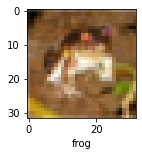

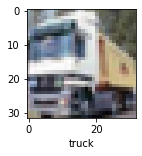

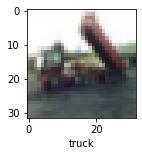

In [5]:
n_samples = 3
for i in range(n_samples):
    plot_sample(train_X, train_Y, i)
    

In [6]:
# Small data preparation...
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
 
train_X = train_X/255.0
test_X = test_X/255.0

In [7]:
ntrain_Y = np_utils.to_categorical(train_Y)
ntest_Y = np_utils.to_categorical(test_Y)

num_classes = ntest_Y.shape[1]
print(ntest_Y[:10])
print("Num_classes:\t",num_classes)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Num_classes:	 10


In [8]:
# Convolution Neural network implementation, much more concise and more raw that will have
# more detail adjustments in paper, start simple then move forward
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(64,activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))

In [9]:
cnn_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [10]:
# Fitting and saving to callbacks_list for tensoboard
callbacks_list = []
cnn_model.fit(train_X, train_Y, callbacks=callbacks_list, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5095 - accuracy: 0.4533
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1456 - accuracy: 0.5966
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0141 - accuracy: 0.6467
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9343 - accuracy: 0.6746
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8776 - accuracy: 0.6956
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8307 - accuracy: 0.7129
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7861 - accuracy: 0.7275
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7482 - accuracy: 0.7406
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7199 - accuracy: 0.7507
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

In [11]:
cnn_model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 2ms/step - loss: 0.9107 - accuracy: 0.6961


[0.91070157289505, 0.6960999965667725]

In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                147520    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [13]:
# Getting the all the test X vectors OUTPUT of size N=10 for each prediction of the classes
y_predictions = cnn_model.predict(test_X)
print("Num_prediction_vectors:\t",len(y_predictions))
print("First_prediction_vector:\n",y_predictions[0])

Num_prediction_vectors:	 10000
First_prediction_vector:
 [9.2203444e-04 2.0972271e-05 2.3645943e-03 8.5755602e-02 5.8357377e-04
 1.2657999e-02 2.4925202e-02 5.5640750e-05 8.7195843e-01 7.5603108e-04]


In [14]:
# Finding most likley to be based on highest val from and getting class corresponding to that test
# Each element is the absolute class that is predicted for that test input at that index
y_classes = [np.argmax(i) for i in y_predictions]

In [15]:
# Straightforward comparison, small part
print("Class Prediction:\t",y_classes[0]) # Extracted classes from predicted
print("Actual Prediction vec:\n",y_predictions[0]) # Actual

Class Prediction:	 8
Actual Prediction vec:
 [9.2203444e-04 2.0972271e-05 2.3645943e-03 8.5755602e-02 5.8357377e-04
 1.2657999e-02 2.4925202e-02 5.5640750e-05 8.7195843e-01 7.5603108e-04]





test_class_predicted: ship


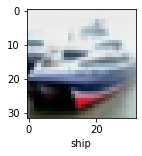

In [17]:
# 1 v 1 comparison
actual_test =  plot_sample(test_X, test_Y, 1)
test_class_predicted = classes[y_classes[1]]
print("test_class_predicted:", test_class_predicted)

In [21]:
def get_remaining_pred(skip_index):
    for i in range(0, 10):
        if (i != skip_index):
            current_predicted = classes[y_classes[i]]
            current_percent = max(y_predictions[i])
            data = "{0:>20}".format(str(current_predicted) + "\t" + str(current_percent))
            print("OTHER_PREDICTION:\t", data)
            


def test_value():
    y_pred_len = len(y_predictions)

    test_index = rd.randint(0, y_pred_len)
    actual_test =  plot_sample(test_X, test_Y, test_index)

    class_predicted = classes[y_classes[test_index]]
    percentage = max(y_predictions[test_index])
    data = "{0:>20}".format(str(class_predicted) + "\t" + str(percentage))
    
    print("MODEL_PREDICTION:\t", data, end="\n\n")
    get_remaining_pred(test_index)
    




MODEL_PREDICTION:	 automobile	0.9201343

OTHER_PREDICTION:	      ship	0.87195843
OTHER_PREDICTION:	      ship	0.93285894
OTHER_PREDICTION:	      ship	0.39690584
OTHER_PREDICTION:	  airplane	0.85623354
OTHER_PREDICTION:	      deer	0.65704083
OTHER_PREDICTION:	      frog	0.95209414
OTHER_PREDICTION:	       cat	0.37473714
OTHER_PREDICTION:	      frog	0.52172357
OTHER_PREDICTION:	        cat	0.5792244
OTHER_PREDICTION:	 automobile	0.9199362


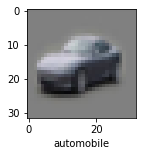

In [22]:
test_value()